In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot as plt
# from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train.astype('float32')/255. , x_test.astype('float32')/255.

x_train, x_test = x_train.reshape([-1, 28, 28, 1]), x_test.reshape([-1, 28, 28, 1]) # 28 x 28 x 1(채널수)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
indices = np.random.permutation(x_train.shape[0])
x_trainval = tf.gather(x_train, indices)
y_trainval = tf.gather(y_train, indices)

x_train = x_trainval[:48000]
x_val = x_trainval[48000:]
y_train = y_trainval[:48000]
y_val = y_trainval[48000:]

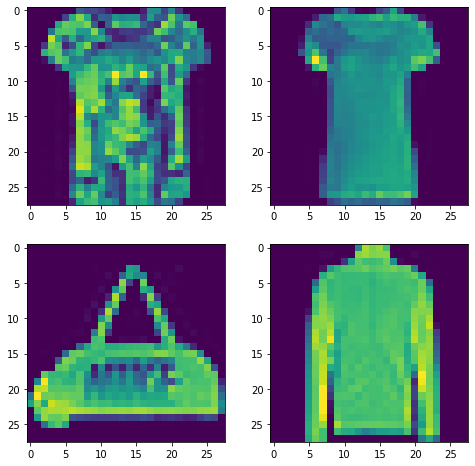

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

axes[0,0].imshow(np.reshape(x_train[np.random.randint(x_train.shape[0])], [28, 28]))
axes[0,1].imshow(np.reshape(x_train[np.random.randint(x_train.shape[0])], [28, 28]))
axes[1,0].imshow(np.reshape(x_train[np.random.randint(x_train.shape[0])], [28, 28]))
axes[1,1].imshow(np.reshape(x_train[np.random.randint(x_train.shape[0])], [28, 28]))

plt.show()

In [9]:
cnn = Sequential()

cnn.add(Conv2D(input_shape = (28,28,1), kernel_size = (3,3), filters = 32, activation='relu'))
cnn.add(MaxPool2D(pool_size = (2,2)))
cnn.add(Conv2D(kernel_size = (3,3), filters = 64, activation = 'relu'))
cnn.add(Conv2D(kernel_size = (3,3), filters = 64, activation = 'relu'))

cnn.add(MaxPool2D(pool_size = (2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(32, activation = 'relu'))
cnn.add(Dropout(0.2))

cnn.add(Dense(10, activation = 'softmax'))

In [10]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [11]:
result = cnn.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.8171 - accuracy: 0.7057 - val_loss: 0.4488 - val_accuracy: 0.8382
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4972 - accuracy: 0.8227 - val_loss: 0.3550 - val_accuracy: 0.8714
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4183 - accuracy: 0.8513 - val_loss: 0.3189 - val_accuracy: 0.8861
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3805 - accuracy: 0.8624 - val_loss: 0.3100 - val_accuracy: 0.8888
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3500 - accuracy: 0.8730 - val_loss: 0.2816 - val_accuracy: 0.8991
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3329 - accuracy: 0.8793 - val_loss: 0.2691 - val_accuracy: 0.9003
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3157 - accuracy: 0.8869 - val_loss: 0.2595 - val_accuracy: 0.9068
Epoch 

In [12]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2743 - accuracy: 0.9027


[0.2742781341075897, 0.9027000069618225]

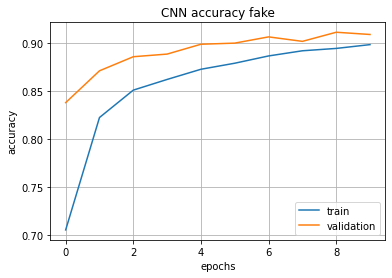

In [17]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('CNN accuracy fake')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['train', 'validation'], loc='best')

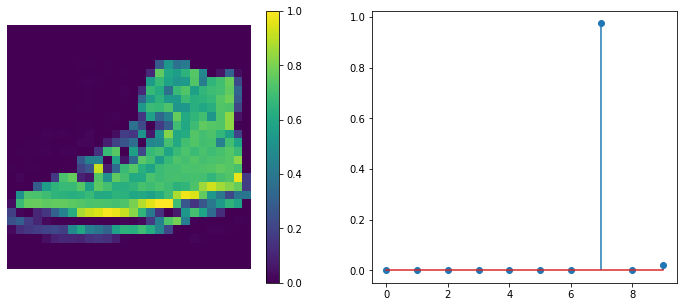

Prediction : Sneaker
Ground Truth : Sneaker


In [72]:
name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']

idx = np.random.choice(x_test.shape[0], 1)
test_img = x_test[idx]
GT = y_test[idx]

predict = cnn.predict_on_batch(test_img)
mypred = np.argmax(predict, axis = 1)

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.imshow(test_img.reshape(28, 28))
plt.colorbar()
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(predict[0])
plt.show()

print('Prediction : {}'.format(name[mypred[0]]))
print('Ground Truth : {}'.format(name[GT[0]]))